In [150]:
import pandas as pd
import numpy as np

In [151]:
df=pd.read_excel('1688640705_hr_comma_sep.xlsx')

# Data Analysis

In [152]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [154]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [155]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [156]:
df['left'].unique()

array([1, 0], dtype=int64)

In [157]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [158]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [159]:
df['Work_accident'].unique()

array([0, 1], dtype=int64)

In [160]:
df[['left']].value_counts()


left
0       11428
1        3571
Name: count, dtype: int64

Above result indicates that we need to apply SMOTE as this shows unblanced data

# Feature Engineering

In [161]:
from sklearn.preprocessing import LabelEncoder

In [162]:
# Label encoding for the 'salary' column as there is some order
label_encoder = LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])

In [163]:
#applying OHE on sales as there is no order in the catagorical values
df_new = pd.get_dummies(df, columns= ['sales'],drop_first= True, dtype='int64')
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [164]:
df_new.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical'],
      dtype='object')

In [165]:
df_new['salary'].unique()

array([1, 2, 0])

In [166]:
# creating target varbale and dependant features
feature = df_new.drop('left', axis = 1)
target = df_new[['left']]

In [167]:
feature

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,1,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,1,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,1,0,0,0,0,0,0,0,1,0


In [168]:
#Applying SMOTE to balance the data
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature, target)

In [169]:
#verifying the balanced data
transformed_label_df.value_counts()

left
0       11428
1       11428
Name: count, dtype: int64

In [170]:
transformed_feature_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
count,22856.000000,22856.000000,22856.000000,22856.000000,22856.000000,22856.000000,22856.000000,22856.000000,22856.000000,22856.000000,22856.000000,22856.000000,22856.000000,22856.000000,22856.000000,22856.000000,22856.000000
mean,0.553226,0.717529,3.801715,203.281152,3.609905,0.100805,0.014876,1.324160,0.039246,0.045240,0.045590,0.030714,0.050840,0.051759,0.270826,0.143813,0.175578
std,0.266057,0.180103,1.441628,54.191917,1.309740,0.301077,0.121058,0.586708,0.194183,0.207834,0.208598,0.172546,0.219676,0.221545,0.444396,0.350908,0.380469
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.383620,0.540000,2.000000,151.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.560000,0.730000,4.000000,204.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.790000,0.881078,5.000000,252.000000,4.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Applying StandardScaler

In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
scaler = StandardScaler()

In [173]:
transformed_std_feature_df = scaler.fit_transform(transformed_feature_df)
#transformed_feature_df[['last_evaluation']]

In [174]:
transformed_std_label_df = scaler.fit_transform(transformed_label_df)
transformed_std_label_df

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

Below we are converting the data again in datafarme

In [175]:
transformed_std_label_df = pd.DataFrame(transformed_std_label_df, columns = transformed_label_df.columns, index = transformed_label_df.index)
transformed_std_label_df.value_counts()

left
-1.0    11428
 1.0    11428
Name: count, dtype: int64

In [176]:
transformed_std_feature_df = pd.DataFrame(transformed_std_feature_df, columns = transformed_feature_df.columns, index = transformed_feature_df.index)
transformed_std_feature_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,-0.651098,-1.041260,-1.249805,-0.854042,-0.465679,-0.334822,-0.122884,-0.552518,-0.202111,-0.217677,-0.218558,-0.178009,-0.231437,-0.233632,1.640856,-0.409841,-0.461487
1,0.927543,0.791070,0.831221,1.083559,1.824901,-0.334822,-0.122884,1.151944,-0.202111,-0.217677,-0.218558,-0.178009,-0.231437,-0.233632,1.640856,-0.409841,-0.461487
2,-1.665939,0.902120,2.218571,1.268092,0.297848,-0.334822,-0.122884,1.151944,-0.202111,-0.217677,-0.218558,-0.178009,-0.231437,-0.233632,1.640856,-0.409841,-0.461487
3,0.626849,0.846595,0.831221,0.363879,1.061374,-0.334822,-0.122884,-0.552518,-0.202111,-0.217677,-0.218558,-0.178009,-0.231437,-0.233632,1.640856,-0.409841,-0.461487
4,-0.688685,-1.096785,-1.249805,-0.817135,-0.465679,-0.334822,-0.122884,-0.552518,-0.202111,-0.217677,-0.218558,-0.178009,-0.231437,-0.233632,1.640856,-0.409841,-0.461487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22851,-1.665939,0.421619,1.524896,0.732945,0.297848,-0.334822,-0.122884,1.151944,-0.202111,-0.217677,-0.218558,-0.178009,-0.231437,-0.233632,1.640856,-0.409841,-0.461487
22852,-0.505621,-1.084241,-1.249805,-1.204655,-0.465679,-0.334822,-0.122884,-0.552518,-0.202111,-0.217677,-0.218558,-0.178009,-0.231437,4.280230,-0.609438,-0.409841,-0.461487
22853,0.959560,0.770506,0.137545,1.231186,1.061374,-0.334822,-0.122884,-0.552518,-0.202111,-0.217677,-0.218558,-0.178009,-0.231437,-0.233632,1.640856,-0.409841,-0.461487
22854,-0.387991,-1.485461,-1.249805,-1.315375,-0.465679,-0.334822,-0.122884,-0.552518,-0.202111,-0.217677,-0.218558,-0.178009,4.320826,-0.233632,-0.609438,-0.409841,-0.461487


In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, y_train, y_test = train_test_split(transformed_std_feature_df, transformed_std_label_df, train_size=0.8, random_state = 10)

# Applying Models

## Logistic Regression Model

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
my_log_model1 = LogisticRegression()
my_log_model1.fit(X_train, y_train)

C:\Program Files\python3.9\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [181]:
y_pred = my_log_model1.predict(X_test)

In [182]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [183]:
accuracy_score(y_test, y_pred)

0.7753718285214348

In [184]:
con_matrix = confusion_matrix(y_test, y_pred)
con_matrix

array([[1730,  551],
       [ 476, 1815]], dtype=int64)

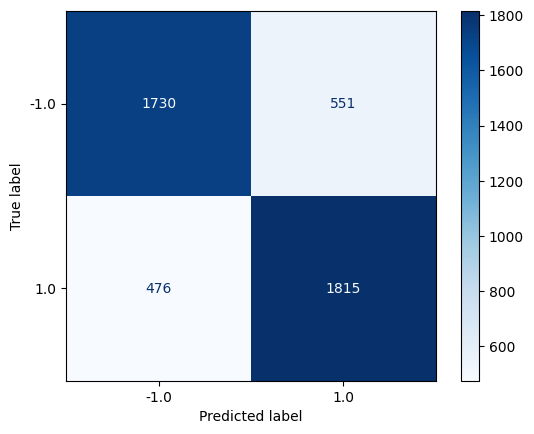

In [185]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=my_log_model1.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.show()

In [188]:
report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.78      0.76      0.77      2281
         1.0       0.77      0.79      0.78      2291

    accuracy                           0.78      4572
   macro avg       0.78      0.78      0.78      4572
weighted avg       0.78      0.78      0.78      4572



### Applying GridSearchCV on Logistic Regression to compare the result

In [187]:
#validating results with GridsearchCV
from sklearn.model_selection import GridSearchCV

mlr = LogisticRegression()
param_grid = {  'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                'C' : np.logspace(-4, 4, 20),
                'solver' : ['newton-cg','liblinear','sag','saga'],
                'max_iter' : [100, 1000,2500, 5000]
              }

grid = GridSearchCV(mlr, param_grid, refit = True, verbose = 1, cv=5, n_jobs=-1)

grid_search=grid.fit(X_train, y_train)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


C:\Program Files\python3.9\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
4000 fits failed out of a total of 6400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Program Files\python3.9\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\python3.9\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Program Files\python3.9\lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalt

In [189]:
print(grid_search.best_params_)

{'C': 0.08858667904100823, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [190]:
#print(grid_search.cv_results_)

In [191]:
y_predict = grid.predict(X_test)


In [193]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_predict, zero_division=1)
print("Classification Report:")
print(report)

Accuracy: 0.7753718285214348
Confusion Matrix:
[[1730  551]
 [ 476 1815]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.78      0.76      0.77      2281
         1.0       0.77      0.79      0.78      2291

    accuracy                           0.78      4572
   macro avg       0.78      0.78      0.78      4572
weighted avg       0.78      0.78      0.78      4572



## SVC Model

In [194]:
# compare model with SVC
from sklearn import svm

my_svm_model1 = svm.SVC()
my_svm_model1.fit(X_train, y_train)

C:\Program Files\python3.9\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [197]:
y_pred_svm = my_svm_model1.predict(X_test)

In [198]:
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred_svm, zero_division=1)
print("Classification Report:")
print(report)

Accuracy: 0.9481627296587927
Confusion Matrix:
[[2191   90]
 [ 147 2144]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.96      0.95      2281
         1.0       0.96      0.94      0.95      2291

    accuracy                           0.95      4572
   macro avg       0.95      0.95      0.95      4572
weighted avg       0.95      0.95      0.95      4572



### Applying GridSearchCV on SVM to compare the result

In [202]:
m2= svm.SVC()
param_grid = {'C': [ 1, 10, 100, 1000,10000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'sigmoid']}

grid_svc = GridSearchCV(m2, param_grid, refit = True, verbose = 1, cv=5, n_jobs=-1)

grid_search_svm=grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Program Files\python3.9\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [204]:
print(grid_search_svm.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [205]:
y_pred_svm_cv = grid_svc.predict(X_test)

In [207]:
accuracy = accuracy_score(y_test, y_pred_svm_cv)
print("Test Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred_svm_cv)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred_svm_cv, zero_division=1)
print("Classification Report:")
print(report)

Test Accuracy: 0.9770341207349081
Confusion Matrix:
[[2237   44]
 [  61 2230]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.97      0.98      0.98      2281
         1.0       0.98      0.97      0.98      2291

    accuracy                           0.98      4572
   macro avg       0.98      0.98      0.98      4572
weighted avg       0.98      0.98      0.98      4572



In [211]:
# getting result on train data to check for overfitting
y_pred_svm_cv_train = grid_svc.predict(X_train)

In [212]:
accuracy = accuracy_score(y_train, y_pred_svm_cv_train)
print("Train Accuracy:", accuracy)

cm = confusion_matrix(y_train, y_pred_svm_cv_train)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_train, y_pred_svm_cv_train, zero_division=1)
print("Classification Report:")
print(report)

Train Accuracy: 0.9965543644716692
Confusion Matrix:
[[9115   32]
 [  31 9106]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00      9147
         1.0       1.00      1.00      1.00      9137

    accuracy                           1.00     18284
   macro avg       1.00      1.00      1.00     18284
weighted avg       1.00      1.00      1.00     18284



# Applying ensemble learning to compare the result

## Bagging on Linear Regression base model

In [216]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

In [220]:
kfold = model_selection.KFold(n_splits=10)
cart1 = LogisticRegression()
num_trees = 100

In [229]:
y_train.shape

(18284, 1)

In [228]:
np.ravel(y_train).shape

(18284,)

In [231]:
model_bag_log = BaggingClassifier(estimator=cart1,n_estimators=num_trees, random_state=12, oob_score=True)

# Perform cross-validation using the model, feature matrix (X), target vector (Y), and specified number of folds (cv)
# np.ravel(y_train) to avoid the warning "A column-vector y was passed when a 1d array was expected"
# that ravel function is used to flaten the the column vector to 1d array
results = model_selection.cross_val_score(model_bag_log, X_train, np.ravel(y_train), cv=kfold)

In [233]:
model_bag_log.fit(X_train,np.ravel(y_train))

BaggingClassifier(estimator=LogisticRegression(), n_estimators=100,
                  oob_score=True, random_state=12)

In [236]:
y_pred_bag_log = model_bag_log.predict(X_test)

In [237]:
accuracy = accuracy_score(y_test, y_pred_bag_log)
print("Test Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred_bag_log)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred_bag_log, zero_division=1)
print("Classification Report:")
print(report)

Test Accuracy: 0.7749343832020997
Confusion Matrix:
[[1730  551]
 [ 478 1813]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.78      0.76      0.77      2281
         1.0       0.77      0.79      0.78      2291

    accuracy                           0.77      4572
   macro avg       0.78      0.77      0.77      4572
weighted avg       0.78      0.77      0.77      4572



In [241]:
results = model_selection.cross_val_score(model_bag_log, X_train, np.ravel(y_train), cv=kfold)
# Should it be done on training dataset?????

# Print the cross-validation results
print(results)

[0.77528704 0.76052488 0.77638054 0.7747403  0.77516411 0.7702407
 0.79212254 0.77352298 0.77789934 0.7833698 ]


In [240]:
# Calculate the Mean Cross-Validation Score using .mean() function
mean_score = np.mean(results)

print("Mean Cross-Validation Score:", mean_score)

Mean Cross-Validation Score: 0.7759252224972573


In [242]:
# Perform cross-validation and compute OOB error
oob_error = 1 - model_bag_log.fit(X_train, np.ravel(y_train)).oob_score_

print("Out-of-Bag Error:", oob_error)
print("Out-of-Bag Score:", model_bag_log.fit(X_train, np.ravel(y_train)).oob_score_)

Out-of-Bag Error: 0.22396630934150075
Out-of-Bag Score: 0.7760336906584993


## Bagging on SVM base model

In [243]:
kfold = model_selection.KFold(n_splits=10)
cart2 = svm.SVC()
num_trees = 100


In [245]:
model_bag_svm = BaggingClassifier(estimator=cart2,n_estimators=num_trees, random_state=12, oob_score=True)

In [248]:
# Perform cross-validation using the model, feature matrix (X), target vector (Y), and specified number of folds (cv)
# np.ravel(y_train) to avoid the warning "A column-vector y was passed when a 1d array was expected"
# that ravel function is used to flaten the the column vector to 1d array

#results = model_selection.cross_val_score(model_bag_svm, X_train, np.ravel(y_train), cv=kfold)

In [249]:
# model_bag_svm.fit(X_train,np.ravel(y_train))

### need to stop it as it is taking a huge time

## Bagging on DecisionTreeClassifier base model

In [251]:
from sklearn.tree import DecisionTreeClassifier

In [253]:
kfold = model_selection.KFold(n_splits=10)
cart3 = DecisionTreeClassifier()
num_trees = 100

In [254]:
model_bag_dtree = BaggingClassifier(estimator=cart3,n_estimators=num_trees, random_state=12, oob_score=True)

In [255]:
# Perform cross-validation using the model, feature matrix (X), target vector (Y), and specified number of folds (cv)
# np.ravel(y_train) to avoid the warning "A column-vector y was passed when a 1d array was expected"
# that ravel function is used to flaten the the column vector to 1d array
results = model_selection.cross_val_score(model_bag_dtree, X_train, np.ravel(y_train), cv=kfold)

In [256]:
model_bag_dtree.fit(X_train,np.ravel(y_train))

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True, random_state=12)

In [257]:
y_pred_bag_dtree = model_bag_dtree.predict(X_test)

In [259]:
accuracy = accuracy_score(y_test, y_pred_bag_dtree)
print("Test Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred_bag_dtree)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred_bag_dtree, zero_division=1)
print("Classification Report:")
print(report)

Test Accuracy: 0.9805336832895888
Confusion Matrix:
[[2263   18]
 [  71 2220]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.97      0.99      0.98      2281
         1.0       0.99      0.97      0.98      2291

    accuracy                           0.98      4572
   macro avg       0.98      0.98      0.98      4572
weighted avg       0.98      0.98      0.98      4572



In [261]:
# Calculate the Mean Cross-Validation Score using .mean() function
mean_score = np.mean(results)

print("Mean Cross-Validation Score for Dtree base model:", mean_score)

Mean Cross-Validation Score for Dtree base model: 0.9809670480335658


In [262]:
# Perform cross-validation and compute OOB error
oob_error = 1 - model_bag_log.fit(X_train, np.ravel(y_train)).oob_score_

print("Out-of-Bag Error:", oob_error)
print("Out-of-Bag Score:", model_bag_log.fit(X_train, np.ravel(y_train)).oob_score_)

Out-of-Bag Error: 0.22396630934150075
Out-of-Bag Score: 0.7760336906584993


- **Is it indicating Overfitting ??? as outof bag score is 0.77**

## Applying Boosting

In [263]:
from sklearn.ensemble import GradientBoostingClassifier

In [265]:
# Initialize lists to store evaluation metrics
accuracy_collection = []
recall_collection = []
precision_collection = []

# Create a K-fold object with 5 splits
kf = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)

kf.split(X_train)

<generator object _BaseKFold.split at 0x0000020A905D0190>

In [287]:
X_train.shape

(18285, 17)

In [276]:
for train_index, val_index in kf.split(X_train):
    print (train_index)
    print("=============")
    print (val_index)
print (train_index.shape)
print (val_index.shape)

[    1     2     4 ... 18281 18282 18284]
[    0     3     8 ... 18260 18280 18283]
[    0     1     2 ... 18282 18283 18284]
[    5    14    15 ... 18257 18272 18274]
[    0     1     2 ... 18282 18283 18284]
[   10    12    17 ... 18263 18273 18281]
[    0     3     5 ... 18282 18283 18284]
[    1     2     4 ... 18269 18276 18279]
[    0     1     2 ... 18280 18281 18283]
[    6     7     9 ... 18278 18282 18284]
(14628,)
(3657,)


In [270]:
# Iterate over the K-fold splits
for train_index, val_index in kf.split(transformed_std_feature_df):
    # Split the data into training and validation sets
    X_train, X_val = transformed_std_feature_df.iloc[train_index], transformed_std_feature_df.iloc[val_index]
    y_train, y_val = transformed_std_label_df.iloc[train_index], transformed_std_label_df.iloc[val_index]

    # Initialize a GradientBoostingClassifier object
    model = GradientBoostingClassifier()

    # Fit the model on the training data
    model.fit(X_train, np.ravel(y_train))

    # Make predictions on the validation set
    predictions = model.predict(X_val)

    # Calculate accuracy and store in accuracy_collection
    accuracy = accuracy_score(np.ravel(y_val), predictions)
    accuracy_collection.append(accuracy)

In [271]:
for i, acc in enumerate(accuracy_collection, start=1):
  print(f'Accuracy of fold {i}: {acc}')

# Print average accuracy across all folds
print(f'Average Accuracy: {np.mean(accuracy_collection)}')

Accuracy of fold 1: 0.9577865266841645
Accuracy of fold 2: 0.9599649967184424
Accuracy of fold 3: 0.9577772916210895
Accuracy of fold 4: 0.9590899146795012
Accuracy of fold 5: 0.9584336031502954
Accuracy of fold 6: 0.9577865266841645
Accuracy of fold 7: 0.9599649967184424
Accuracy of fold 8: 0.9577772916210895
Accuracy of fold 9: 0.9590899146795012
Accuracy of fold 10: 0.9584336031502954
Average Accuracy: 0.9586104665706985


In [272]:
report = classification_report(y_val, predictions, zero_division=1)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.97      0.96      2261
         1.0       0.97      0.94      0.96      2310

    accuracy                           0.96      4571
   macro avg       0.96      0.96      0.96      4571
weighted avg       0.96      0.96      0.96      4571



In [273]:
report = classification_report(y_val, predictions, output_dict=True)
report

{'-1.0': {'precision': 0.9434689507494647,
  'recall': 0.9743476337903583,
  'f1-score': 0.9586597040905135,
  'support': 2261.0},
 '1.0': {'precision': 0.9740608228980322,
  'recall': 0.9428571428571428,
  'f1-score': 0.9582050153981522,
  'support': 2310.0},
 'accuracy': 0.9584336031502954,
 'macro avg': {'precision': 0.9587648868237484,
  'recall': 0.9586023883237506,
  'f1-score': 0.9584323597443328,
  'support': 4571.0},
 'weighted avg': {'precision': 0.958928855510609,
  'recall': 0.9584336031502954,
  'f1-score': 0.9584299226686464,
  'support': 4571.0}}

### some confusion in the last part that is why not implemented

In [277]:
recall_collection

[]

In [279]:
recall = report['1.0']['recall']

In [280]:
recall_collection

[]

In [281]:
recall

0.9428571428571428

In [282]:
precision = report['1.0']['precision']

In [283]:
precision

0.9740608228980322

In [284]:
recall_collection.append(recall)
precision_collection.append(precision)

In [285]:
recall_collection

[0.9428571428571428]

In [286]:
precision_collection

[0.9740608228980322]